# 머신 러닝

* 인공지능 
    - 인간의 지각능령, 학습능력, 추론능력을 갖춘 컴퓨터 시스템
    - 인공지능 > 머신러닝 > 딥러닝
    - 시행착오를 거쳐 휴리스틱을 찾는 것???
    - 퍼셉트론 : 인공 신경망의 시작
        - 인간의 뉴런이 학습하는 원리를 모방 : 퍼셉트론
            - 자극에 대한 반응으로 행동
        - 문제점 : 선형 문제밖에 해결하지 못했다. ex. XOR 문제
    - 오차 역전파 : 인공지능 퍼셉트론 침체 이후 도약
        - 오차 역전파 만으로는 매우 많은 층을 가진 모델을 제대로 학습시키기 어렵다 
            - ex. 출력 부분의 오류가 입력 쪽에 가까운 네트워크 층까지 잘 전파되지 않는다는 것
        - 합성곱 신경망 모델을 만들어 심층 신경망을 효과적으로 학습시킬 돌파구를 마련
        
* 머신러닝
    - 하나하나 모든 지시를 구현하던 고전적인 인공지능
    - 랜덤한 값을 가진 파라미터가 입력 값에 따라 반응하고 좋은 결과는 학습하는 것이 머신러닝
    - 작업 T, 성능 P, 경험 E
    - 지도학습과 비지도학습, 강화 학습, 준지도 학습
        - 지도학습 : 정답 데이터를 가지고 랜덤한 답을한 머신에게 오답이면 페널티를 주면서 파라미터의 변화를 학습
        - 비지도학습 : 외부의 정답없이 학습 알고리즘이 스스로 입력으로부터 구조를 발견하는 학습
            - 비지도 학습을 사용하면 데이터에서 숨겨진 패턴을 발견할 수 있다. : 군집화
        - 강화 학습 : 보상 및 처벌의 형태로 학습
        - 준지도 학습 : 정답이 일부만 제공
    - 충분한 데이터가 필요
        - 데이터 편향 : 모집단의 분포를 제대로 반영하지 못하고 일부 특성만 가짐
            - 너무 적은 수의 표본을 추출
            - 표집 방법이 잘못되어 모집단에 속한 대항을 골고루 추출하지 못 하는 경우
        - 부정확성 : 오류와 이상치, 잡음을 포함
            - 데이터 품질이 낮음
        - 무관함
            - 데이터의 특성이 학습하려는 문제와 무관, 데이터가 엄청 많으면 해결

* 

In [1]:
# 퍼셉트론 만들기
# 입력이 들어오면 가중치(파라미터)를 곱해주고 그 결과를 모두 합해서 출력 (y = ax + b, x1, x2, x3, ..., a1, a2, a3, ...)

In [9]:
import numpy as np

In [42]:
# y = ax + b
# y = XW + b

# 학습능력 없는 1차 방정식 + 학습능력을 구현 fit + w, b 영향도에 따라 fit 수정 + 오류값에 크게 반응하기 때문에 학습률 lr 추가
## numpy array 데이터로 동작 가능하게 변경

class Perceptron :
    
    def __init__(self, lr = 0.1) :
        self.w = 1 #random.rand(0)
        self.b = 0
        self.lr = lr
    
    # 학습능력 구현
    def fit(self, x, y) : # 지도학습 x는 입력 y는 정답 p는 머신의 출력
        p = self.predict(x)
        
        # 에러, 페널티 틀린 것을 인지
        # e가 음수면 크게 예측, 양수면 작게 예측
        ## np.dot(e, x)에 n개의 데이터가 한번에 연산되기 때문에 값이 커졌다. x의 길이만큼 변동폭을 줄여준다. e가 평균 e가된다
        e = (y - p) / len(x) 
        ## e = y - p
        
        # 크게 예측 했으면 음수인 e를 더해줘서 예측 값을 줄이고 작게 예측 했으면 양수인 e를 더해줘서 예측 값을 늘려준다.
        ## numpy array로 연산는 불가능한 연산
        ## np array의 값 하나하나를 연산해서 더한 값을 w에 넣어준다. = 벡터 내적연산
        self.w += self.lr * np.dot(e, x) # np.sum(e + x)
        self.b += self.lr * np.sum(e)
        
        ## self.w += self.lr * e * x 수정
        ## self.b += self.lr *e 수정
        
    def predict(self, x) :
        return x * self.w + self.b

In [ ]:
# 지도 학습을 하기위해서는 정답과 데이터가 필요하다.
# a, b를 모르는 상태에서 X 입력, Y 결과를 가지고 a, b를 찾아내는 것이 퍼셉트론이 하는 일
'''
ex.
a = 3 
b = 1
X = [1, 2, 3, 4, 5]
Y = [4, 7, 10, 13, 16]
'''

In [43]:
# 30개의 입력 데이터 정답 데이터
X = np.random.randn(30)
Y = 3 * X + 1

In [44]:
perc = Perceptron()

In [40]:
# w는 x에 곱해져 영향을 미치고 b는 그대로 영향을 미치기 때문에 영향도에 따라 fit에서 학습해줘야 한다.
# 오류 값에 크게 반응해서 3, 1에 가까워 지다가도 다시 멀어지기 때문에 학습률을 정해준다.
# 변동 폭이 크지않고 천천히, 정밀하게 학습해간다.

for x, y in zip(X, Y) :
    perc.fit(x, y)
    print('w :', perc.w, 'b :', perc.b)

w : 2.8128416310417617 b : 0.8172303652716396
w : 2.8280498538670114 b : 0.845555990263883
w : 2.855733740407162 b : 0.8764224603215616
w : 2.881118067370785 b : 0.9027107557733255
w : 2.879263145320902 b : 0.9088445960957159
w : 2.8848665461239427 b : 0.9039988048380055
w : 2.8882610868540683 b : 0.9166806850418883
w : 2.890570374805231 b : 0.9142770995727687
w : 2.902325528569615 b : 0.9306878990716189
w : 2.901112678882476 b : 0.9345584400712222
w : 2.90056907508901 b : 0.9355216347604616
w : 2.91916846335874 b : 0.952721571296743
w : 2.9206569584048543 b : 0.9508878911860638
w : 2.9203564797662755 b : 0.9552529230245194
w : 2.923725910019614 b : 0.9631330670430952
w : 2.9239146110735788 b : 0.9671757833690694
w : 2.9356951142958563 b : 0.95920835278077
w : 2.939820932426563 b : 0.9557079962846442
w : 2.9396206600345884 b : 0.9598459355985506
w : 2.9402813109317907 b : 0.9646855707973173
w : 2.9619209203658565 b : 0.9549470894163231
w : 2.960641041153093 b : 0.9567516840179773
w : 2

In [46]:
## 벡터 연산을 이용해서 for문 없이 수행

for _ in range(10) :
    perc.fit(X, Y)
    print('w :', perc.w, 'b :', perc.b)

w : 1.20437334294638 b : 0.07248067915568994
w : 1.387453709872429 b : 0.1405253981940937
w : 1.5515024138782711 b : 0.20428476900752307
w : 1.698536206923481 b : 0.2639254571994245
w : 1.8303541741487455 b : 0.31962521163501934
w : 1.9485616265362502 b : 0.3715687610936131
w : 2.0545913312205117 b : 0.41994445001056757
w : 2.14972237999243 b : 0.4649415027669434
w : 2.235096962239165 b : 0.5067478211743868
w : 2.31173527821228 b : 0.5455482330014841


In [52]:
print(X)

a = np.sum(X + 3)
b = np.dot(X, 2)
print(a)
print(X + 1)
print(b)

[ 0.18363424  2.81130024  0.49275899  0.71024363  0.70438151 -1.87077782
 -1.08442565 -1.03115644 -2.3089787  -0.34136763 -0.19707659  1.23750763
 -0.08762439  0.36112575 -0.03572823 -1.51530433 -1.07327484 -1.22577716
  0.52929831  0.28941214 -0.77136259 -0.13083997  1.05417962 -1.15979073
 -0.38606343 -0.84271293  0.01265549  0.7862435   0.87687974 -0.11525747]
85.8721018733535
[ 1.18363424  3.81130024  1.49275899  1.71024363  1.70438151 -0.87077782
 -0.08442565 -0.03115644 -1.3089787   0.65863237  0.80292341  2.23750763
  0.91237561  1.36112575  0.96427177 -0.51530433 -0.07327484 -0.22577716
  1.52929831  1.28941214  0.22863741  0.86916003  2.05417962 -0.15979073
  0.61393657  0.15728707  1.01265549  1.7862435   1.87687974  0.88474253]
[ 0.36726848  5.62260049  0.98551797  1.42048727  1.40876302 -3.74155564
 -2.16885131 -2.06231287 -4.61795739 -0.68273526 -0.39415318  2.47501525
 -0.17524878  0.7222515  -0.07145645 -3.03060866 -2.14654967 -2.45155432
  1.05859662  0.57882427 -1.5427

In [53]:
# 퍼셉트론은 x, w가 여러개이다. 
# iris의 특징은 4가지 꽃잎 길이, 넓이 .. 가 x1 ~ x4라고 생각하면 w 검토를 통해 꽃의 종 Y를 출력해 낸다.

# 벡터와 행렬
    
    * 벡터 : 순서가 있는 스칼라 값의 배열 : 화살표
    * 벡터의 크기 : 노름
    * 퍼셉트론 식 : [x1, x2, x3, x4 ...xn] dot [w1, w2, w3, w4 ... wn]T + b
    * 내적 = x1*w1 + x2*w2 + x3*w3 + ... + xn*wn
    * 행렬 : 벡터가 여러개
        - 행렬의 내적 : (m x n) dot (n x 1) = (m x 1)

In [54]:
# 멀티 퍼셉트론
# 각각의 퍼셉트론이 각각의 w, b를 가진다.
# X (m * n) dot W (n * k) = Y (m * k) , k : 퍼셉트론 tn, m개가 그대로 나오는 것은 각각의 데이터가 독립적으로 서로 간섭을 일으키지 않는다는 의미

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

# 4개 특성, 1개 정답, 150개 데이터
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
X = iris.iloc[:, :4].values # 4특성을 가진 150개, 150 x 4 행렬
y = iris.iloc[:, 4].values # 1 정답을 가진 150개, 150 x 1 행렬

# setosa 인지 아닌지 구별
# setosa이면 -1, 아니면 1
y = np.where(y == 'Iris-setosa', -1, 1) 

# 4 특징 중 Length 2개 특징만 사용
X = X[:, [0, 2]]

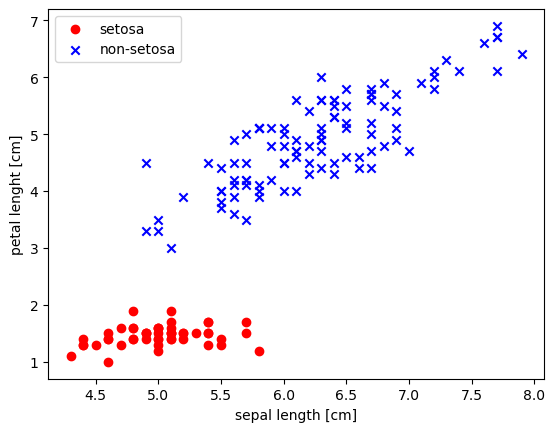

In [79]:
plt.figure()

# x축을 sepal length, y축을 petal length

plt.scatter(X[y == -1, 0], X[y == -1, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 'x', label = 'non-setosa')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')

plt.legend()
plt.show()

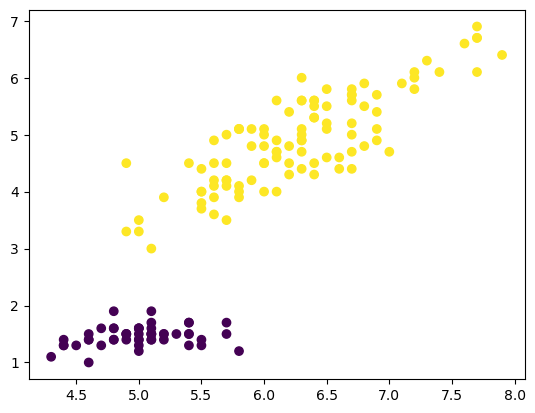

In [80]:
plt.figure()

# y를 이용해 각각 색을 다르게 지정 c = y
plt.scatter(X[:, 0], X[:, 1], c = y)

In [90]:
import numpy as np

class Perceptron(object): 
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0) # 학습률
    n_iter : int
      Passes over the training dataset. # 학습을 몇번 반복
    random_state : int
      Random number generator seed for random weight # 가중치를 랜덤하게 만들 때 사용
      initialization.
    shuffle # 들어온 데이터를 섞어 준다
    
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=False, random_state=1):
        self.eta = eta 
        self.n_iter = n_iter 
        self.shuffle = shuffle 
        self.random_state = random_state 

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # b = 1, 특성의 개수 X.shape[1]
        self.errors_ = []

        for _ in range(self.n_iter): # n_iter 만큼 반복 학습
            errors = 0
            if self.shuffle:
                X, y = self._shuffle(X, y)
                
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) # 결과, 예측치 차이에 학습률을 곱해서 가중치 업데이트
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0) # update가 0이면 틀린게 없고 에러에 + 0, 있다면 + 1
            self.errors_.append(errors)
            
            self.plot_decision_regions(X, y, self)
            
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def net_input(self, X):  # 퍼셉트론 계산, net_input의 결과를 예측확률
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] # X와 w 내적 후 편향 b를 더해준다

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) # 퍼셉트론 계산 결과가 양수면 1, 음수면 -1 반환  
                                                         # 0을 기준선, 멀면 확실, 가까우면 애매
        
    def plot_decision_regions(self, X, y, classifier, resolution=0.02): # classifier 분류기, 모델, 퍼셉트론

        # setup marker generator and color map
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # plot the decision surface 잘린 공간 표현
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        #print(xx1)
        #print(xx2)
        #print(np.array([xx1.ravel(), xx2.ravel()]).T)

        # 
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 공간 색칠
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # plot class samples
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, c=cmap(idx),
                        edgecolor='black',
                        marker=markers[idx], 
                        label=cl)
        
        plt.xlabel('sepal length [cm]')
        plt.ylabel('petal lenght [cm]')

        plt.legend()
        plt.show()

In [94]:
perc = Perceptron(eta = 0.00001, n_iter = 10, shuffle = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_5356\1724957248.py:106: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_5356\1724957248.py:106: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


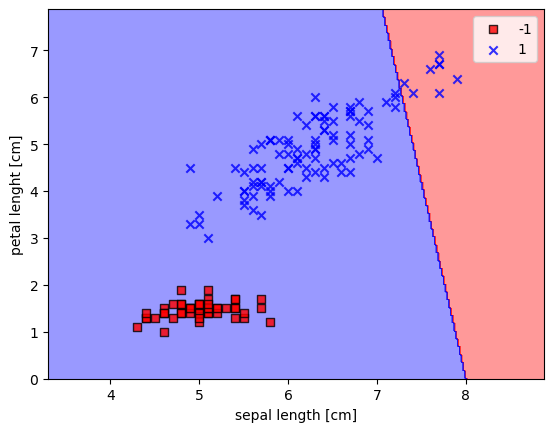

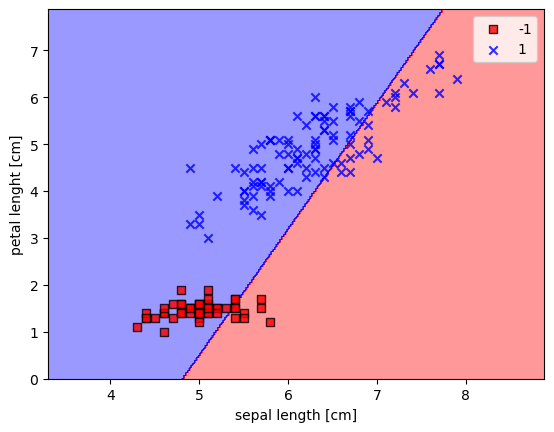

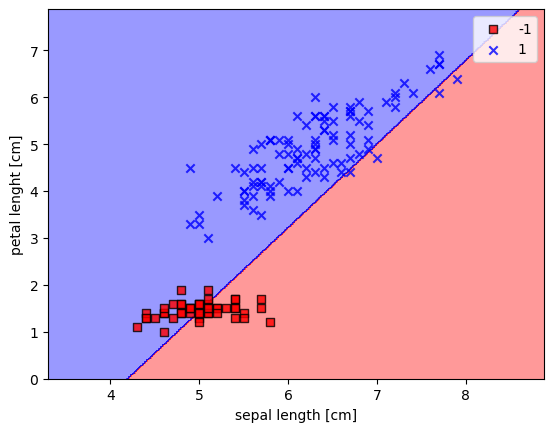

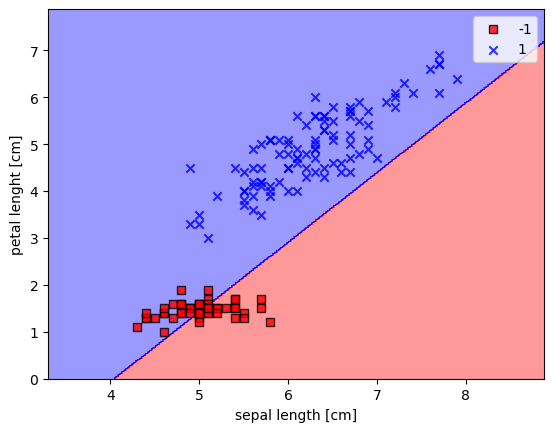

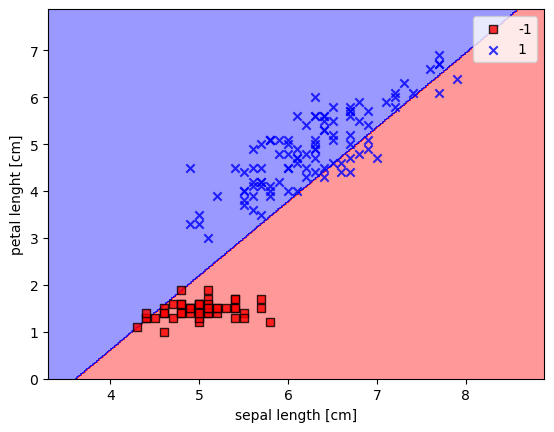

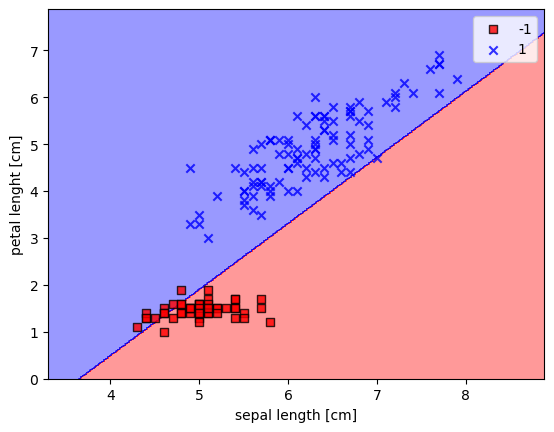

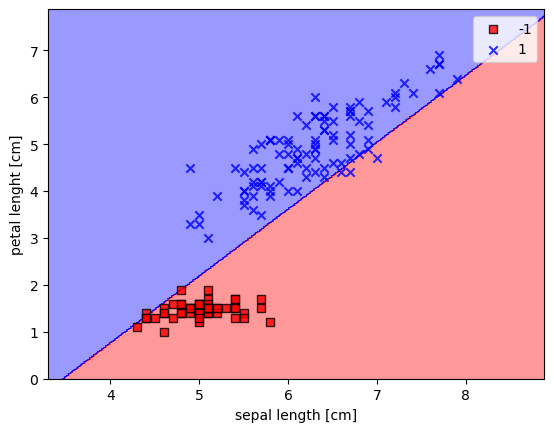

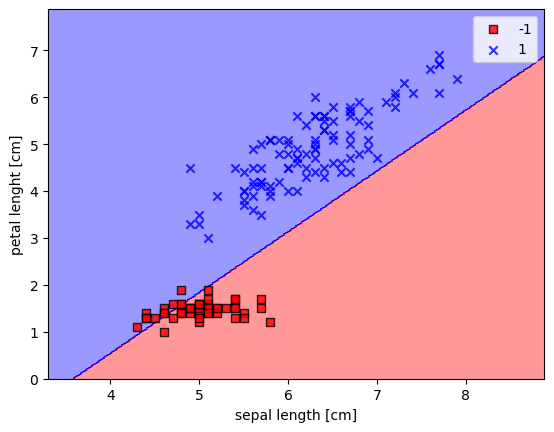

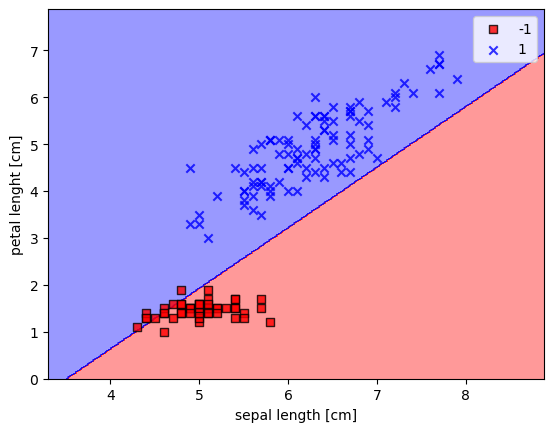

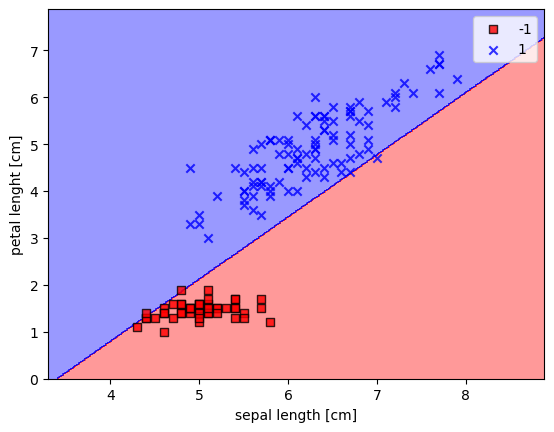

[95, 77, 42, 24, 15, 12, 10, 6, 6, 4]

In [95]:
perc.fit(X, y)
perc.errors_

In [84]:
perc.errors_ # 처음엔 5번 오류 이후로는 오류가 없다.

[5, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [97]:
perc.w_

array([ 0.01554345, -0.00457156,  0.00344628])

In [87]:
# 3차원 그리기 

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02): # classifier 분류기, 모델, 퍼셉트론

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface 잘린 공간 표현
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 공간 색칠
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

C:\Users\PC\AppData\Local\Temp\ipykernel_5356\1381767282.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_5356\1381767282.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


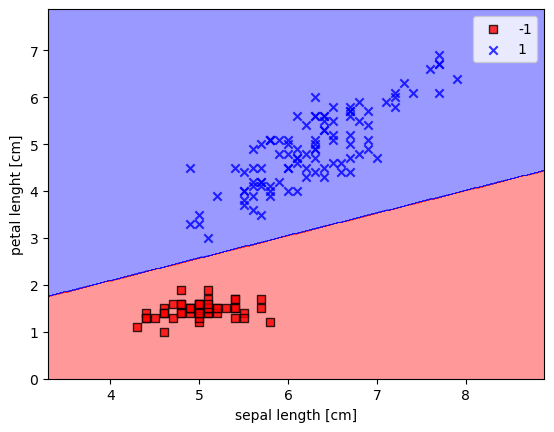

In [88]:
plot_decision_regions(X, y, perc)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')

plt.legend()
plt.show()